In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

def ant_colony_optimization(ants, num_iterations, alpha, beta, evaporation_rate, distance_matrix):
    n = len(distance_matrix)
    pheromone = np.ones((n, n))  
    heuristic = 1 / (np.array(distance_matrix) + 1e-10)

    best_path = None
    best_cost = float('inf')
    best_costs = [] 

    for interation in range(num_iterations):
        paths = []
        costs = []

        for ant in range(ants):
            path = [random.randint(0, n - 1)] # start from a random city

            while len(path) < n:
                current = path[-1] #current city
                probs = []         #(next city, probability weight)

                # calculate probabilities for unvisited cities
                for j in range(n):
                    if j not in path: # unvisited cities
                        tau = pheromone[current][j] ** alpha #pheromone influence
                        eta = heuristic[current][j] ** beta #heuristic influence
                        probs.append((j, tau * eta))

                total = sum(p for _, p in probs)
                probs = [(j, p / total) for j, p in probs]

                # select next city based on random weights probabilities
                next_city = random.choices(
                    [j for j, _ in probs],
                    weights=[p for _, p in probs]
                )[0]
                path.append(next_city)

            # total cost for the path
            cost = sum(distance_matrix[path[i]][path[(i + 1) % n]] for i in range(n))
            paths.append(path)
            costs.append(cost)

            # update best cost and path
            if cost < best_cost:
                best_cost = cost
                best_path = path

        best_costs.append(best_cost)
        pheromone *= (1 - evaporation_rate)

        # update pheromone
        for path, cost in zip(paths, costs):
            for i in range(n):
                a, b = path[i], path[(i + 1) % n]
                pheromone[a][b] += 1 / cost

    return best_path, best_cost, best_costs

# READ INSTANCE FROM TSPLIB ATSP FILE

def parse_tsplib_atsp(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    dimension = 0
    matrix_started = False
    matrix = []

    for line in lines:
        line = line.strip()
        if line.startswith("DIMENSION"):
            dimension = int(line.split(":")[1])
        elif line.startswith("EDGE_WEIGHT_SECTION"):
            matrix_started = True
            continue
        elif matrix_started:
            if line == "EOF":
                break
            matrix.extend(map(int, line.split()))

    # Convert flat list to 2D matrix
    distance_matrix = []
    for i in range(dimension):
        row = matrix[i * dimension:(i + 1) * dimension]
        distance_matrix.append(row)

    return distance_matrix


br17 iniciada


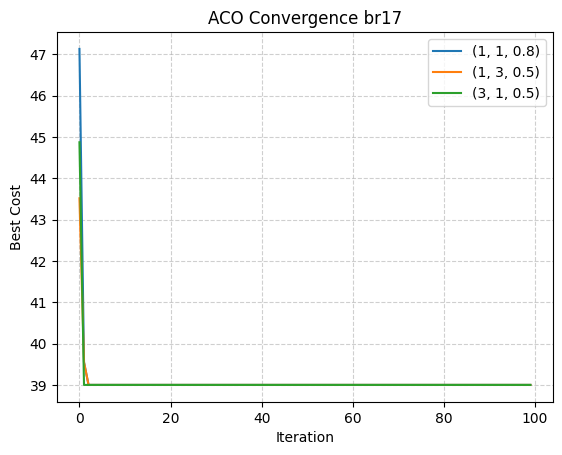

ft53 iniciada


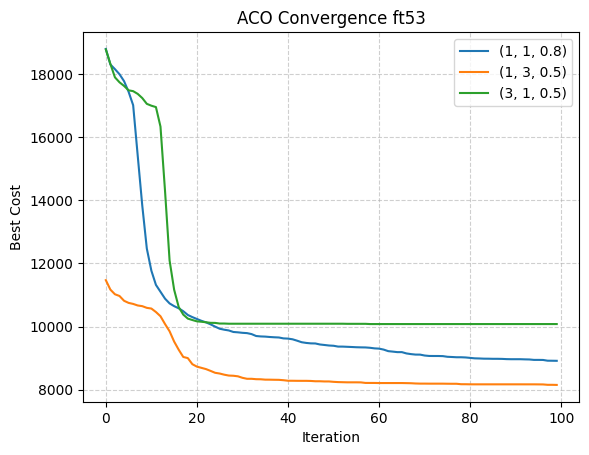

kro124p iniciada


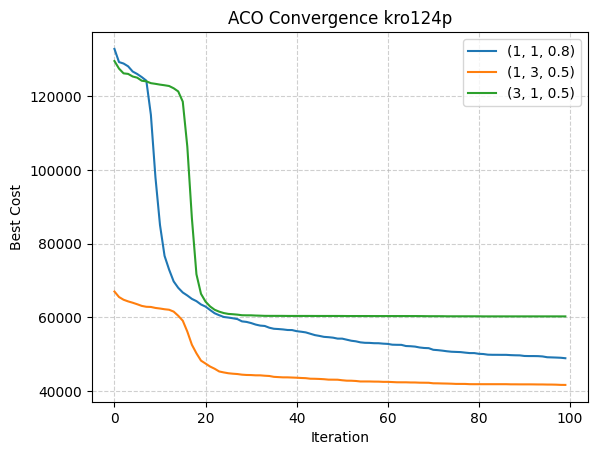

<Figure size 640x480 with 0 Axes>

In [11]:
parameters = [(1, 1, 0.8), (1, 3, 0.5), (3, 1, 0.5)]
n_runs = 31
num_iterations = 100
instances = ["br17", "ft53", "kro124p"]  
optimal_values = {
    "br17": 39,
    "ft53": 6905,
    "kro124p": 36230}
all_results = {}
all_best_values = {}
convergence_values = {}
ants = 10 # number of ants
for instance in instances:
    print(f"{instance} iniciada")
    dist_mat = parse_tsplib_atsp(f"{instance}.atsp") 
    results = {}
    convergence_values = {}
    best_values_run = {}
    for par in parameters:
        alpha, beta, evaporation_rate = par
        convergence_values[par] = []
        best_values_run[par] = []
        optimal_count = 0
        values = []
        for i in range(n_runs):
            #print(f"Iteración: {i+1}")
            _, best_value, best_values = ant_colony_optimization(ants, num_iterations, alpha, beta, evaporation_rate, dist_mat)
            values.append(best_value)
            convergence_values[par].append(best_values)
            best_values_run[par].append(best_value)
            if best_value == optimal_values[instance]:
                optimal_count += 1
        std = int(np.std(values))
        mean = int(np.mean(values))
        median = int(np.median(values))
        results.update({f"N. Optimal reached {par}" : optimal_count, f"Mean {par}" : mean, f"Median {par}": median, f"Std {par}": std})
    for i in range(len(parameters)):
        avg_best_costs = np.mean(np.array(convergence_values[parameters[i]]), axis = 0)
        plt.plot(avg_best_costs, label = f"{parameters[i]}")
    plt.xlabel("Iteration")
    plt.ylabel("Best Cost")
    plt.title(f"ACO Convergence {instance}")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{instance}_convergence.png")
    plt.show()
    plt.clf()
    
    all_results[instance] = results
    all_best_values[instance] = best_values_run



In [12]:
resultados_df = pd.DataFrame(all_results).T
resultados_df.to_csv("Resultados.csv")
best_values_df = pd.DataFrame(all_best_values).T
best_values_df.to_csv("run_values.csv")
print("Excel guardado")

Excel guardado


Wilcoxon

In [ ]:
from scipy.stats import mannwhitneyu
import itertools
for instance in instances:
    best_values_runs = all_best_values[instance]
    configs = list(best_values_runs.keys())
    print(instance)
    results_stats = {}

    for (p1, p2) in itertools.combinations(configs, 2):
        data1 = best_values_runs[p1]
        data2 = best_values_runs[p2]

        stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

        results_stats[(p1, p2)] = {
            "U-statistic": stat,
            "p-value": p_value
        }

    for pair, res in results_stats.items():
        print(f"{pair}: U={res['U-statistic']:.3f}, p={res['p-value']:.5f}")



br17
((1, 1, 0.8), (1, 3, 0.5)): U=480.500, p=1.00000
((1, 1, 0.8), (3, 1, 0.5)): U=480.500, p=1.00000
((1, 3, 0.5), (3, 1, 0.5)): U=480.500, p=1.00000
ft53
((1, 1, 0.8), (1, 3, 0.5)): U=907.000, p=0.00000
((1, 1, 0.8), (3, 1, 0.5)): U=35.000, p=0.00000
((1, 3, 0.5), (3, 1, 0.5)): U=0.000, p=0.00000
kro124p
((1, 1, 0.8), (1, 3, 0.5)): U=961.000, p=0.00000
((1, 1, 0.8), (3, 1, 0.5)): U=2.000, p=0.00000
((1, 3, 0.5), (3, 1, 0.5)): U=0.000, p=0.00000
